# ML for Titanic

> 작성자: 최민정 (Min-jeong Choi)

## 0. 라이브러리 호출

In [1]:
import os

#library import and set
import warnings
warnings.filterwarnings("ignore")
import collections

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
plt.style.use('ggplot')

fm.get_fontconfig_fonts()
font_location = '/data/notebook_files/font/esamanru Medium.ttf'
# font_location = 'C:/Windows/Fonts/NanumGothic.ttf' # For Windows
fprop = fm.FontProperties(fname=font_location)

# matplotlib.rc('font', family=font_name)
# from sklearn import ?
# from sklearn.metrics import ?

## 1. 데이터 로드

In [2]:
print(os.getcwd())

C:\Users\samsung\TIL\ML_DL\Semi-project 1 (Feature engineering _ applying ML algorithms)\Semi-project 1 (Titanic survival analysis)\Blank file & Answer files


In [3]:
# titan_df.columns

In [4]:
# 전처리된 titanic data csv 파일 불러오기
titan_df = pd.read_csv('no_na_titanic_df.csv')
titan_df.drop('Unnamed: 0', axis=1, inplace=True)

# 칼럼 순서 변경
titan_df = titan_df[['Survived', 'Pclass', 'Sex', 'Title', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

titan_df.head()

,Survived,Pclass,Sex,Title,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,Mr.,22.0,1,0,7.2500,S
1,1,1,female,Mrs.,38.0,1,0,71.2833,C
2,1,3,female,Miss.,26.0,0,0,7.9250,S
3,1,1,female,Mrs.,35.0,1,0,53.1000,S
4,0,3,male,Mr.,35.0,0,0,8.0500,S


In [5]:
# data infomation check
titan_df.info()  # non-null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Title     891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


## 2. 인코딩
* encoding feautres = ['Title', 'Sex', 'Embarked']

In [6]:
from sklearn import preprocessing

In [7]:
def encode_features(df):
    features = ['Title', 'Sex', 'Embarked']  # 인코딩 필요한 features
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
        
    return df

encode_titanic_df = encode_features(titan_df)
encode_titanic_df.head()

,Survived,Pclass,Sex,Title,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,2,22.0,1,0,7.2500,2
1,1,1,0,3,38.0,1,0,71.2833,0
2,1,3,0,1,26.0,0,0,7.9250,2
3,1,1,0,3,35.0,1,0,53.1000,2
4,0,3,1,2,35.0,0,0,8.0500,2


##  3. 학습/예측/평가

> 아래 3가지의 알고리즘으로 학습/예측/평가하여 모델들을 상호 평가해보기.

    - 1. logistic regression
    - 2. Decision Tree
    - 3. Random Forest

#### ML 모델 적용 위한 Library 호출

In [8]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

In [9]:
# feature데이터 셋과 Label 데이터 셋 추출. 
y_titan = encode_titanic_df['Survived']
X_titan = encode_titanic_df.drop('Survived', axis=1)

# check
y_titan
X_titan

,Pclass,Sex,Title,Age,SibSp,Parch,Fare,Embarked
0,3,1,2,22.0,1,0,7.2500,2
1,1,0,3,38.0,1,0,71.2833,0
2,3,0,1,26.0,0,0,7.9250,2
3,1,0,3,35.0,1,0,53.1000,2
4,3,1,2,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,2,1,4,27.0,0,0,13.0000,2
887,1,0,1,19.0,0,0,30.0000,2
888,3,0,1,16.0,1,2,23.4500,2
889,1,1,2,26.0,0,0,30.0000,0


In [10]:
# 추출된 feature 데이터 세트와 Label 세트를 tran_test_split 함수에 넣어서, 
# train 데이터셋과 test 데이터셋으로 분리: 비율 7:3, seed는 0 적용
X_train, X_test, y_train, y_test=train_test_split(X_titan, y_titan, test_size=0.3, random_state=0)

#### ML 모델 적용 위한 Library 호출

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [12]:
# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
lr_clf = LogisticRegression(random_state=0)
dt_clf = DecisionTreeClassifier(random_state=0)
rf_clf = RandomForestClassifier(random_state=0)

### 1) Logistic Regression Model

In [13]:
# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)

y_pred_probability = lr_clf.predict_proba(X_test)[:,1]

print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

LogisticRegression 정확도: 0.8097


In [14]:
# 테스트 데이터셋에 대한 정확도, 정밀도, 특이도, f1 평가 지표를 각각 출력한다.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("accuracy: %.2f" % accuracy_score(y_test, lr_pred))
print("Precision : %.3f" % precision_score(y_test, lr_pred))
print("Recll: %.3f" % recall_score(y_test, lr_pred))
print("F1 : %.3f" % f1_score(y_test, lr_pred))

accuracy: 0.81
Precision : 0.758
Recll: 0.720
F1 : 0.738


    그렇다면 이 모델이 생존자를 얼마나 잘 분류하는지 어떻게 평가할까?   
    일반적으로 분류 모델의 평가 기준은 Confusion Matrix라는 것을 활용 한다.   
    다음의 코드는 정확도, 정밀도, 특이도, F1-score 네 가지 지표로 모델을 평가한 것이다.   
    predict()함수로 분류한 예측값들을 sklearn.metrics모듈의 accuracy_score, precision_score, recall_score, f1_score 함수에 적용하면 다음과 같은 출력 결과를 얻을 수 있다.

In [15]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix를 출력한다.
confmat = confusion_matrix(y_true=y_test, y_pred=lr_pred)
print(confmat)

[[145  23]
 [ 28  72]]


    마지막으로 AUC를 출력해보자.   
    AUC 출력은 분류 결과인 0혹은 1의 y값(y_pred)을 사용하는 것이 아니라, 분류 직전의 확률값(y_pred_probability)인 0~1 사이의 값을 사용해야 한다.   
    아래 코드는 AUC를 출력함과 동시에 ROC Curve를 그래프로 나타낸 것이다.   
    이 모델의 AUC는 약 0.837로, 생존자를 잘 분류해내는 모델이라고 평가할 수 있다.

AUC : 0.855


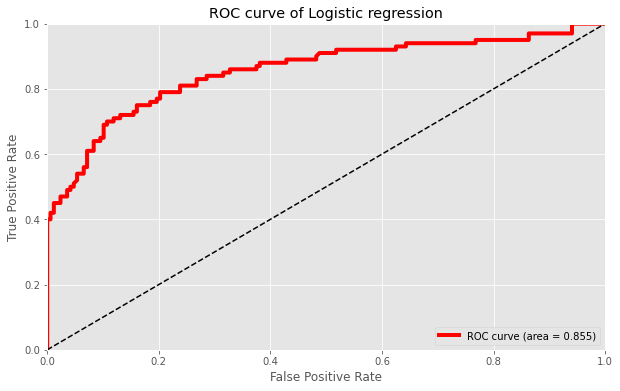

In [16]:
from sklearn.metrics import roc_curve, roc_auc_score

# AUC (Area Under the Curve)를 계산하여 출력합니다.
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_probability)
roc_auc = roc_auc_score(y_test, y_pred_probability)
print("AUC : %.3f" % roc_auc)

# ROC curve를 그래프로 출력합니다.
plt.rcParams['figure.figsize'] = [10, 6]
plt.plot(false_positive_rate, true_positive_rate, label='ROC curve (area = %0.3f)' % roc_auc, 
         color='red', linewidth=4.0)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of Logistic regression')
plt.legend(loc="lower right")

### 2) Decision Tree Model

    아래 코드와 실행 결과는 로지스틱 회귀 모델과 더불어 분류 분석의 가장 대표적인 방법인 의사결정나무(Decision Tree)모델을 적용한 결과 이다.   
    하지만 로지스틱 회귀 모델에 비해 모든 평가 지표가 낮은 것을 확인할 수 있다.

In [17]:
# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train , y_train)
dt_pred = dt_clf.predict(X_test)
y_pred_probability = dt_clf.predict_proba(X_test)[:,1]

print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

DecisionTreeClassifier 정확도: 0.7873


In [18]:
# 학습한 모델의 성능을 계산하여 출력한다.
print("accuracy: %.2f" % accuracy_score(y_test, dt_pred))
print("Precision: %.3f" % precision_score(y_test, dt_pred))
print("Recall: %.3f" % recall_score(y_test, dt_pred))
print("F1: %.3f" % f1_score(y_test, dt_pred))

accuracy: 0.79
Precision: 0.717
Recall: 0.710
F1: 0.714


In [19]:
# 학습한 모델의 AUC를 계산하여 출력한다.
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_probability)
print("AUC: %.3f" % roc_auc)

AUC: 0.855


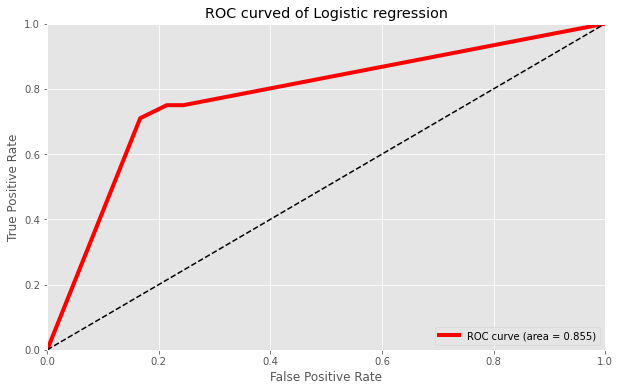

In [20]:
# ROC curve를 그래프로 출력한다.
plt.rcParams['figure.figsize'] = [10,6]
plt.plot(false_positive_rate, true_positive_rate, label='ROC curve (area = %0.3f)'% roc_auc, color='red', linewidth=4.0)

plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curved of Logistic regression')
plt.legend(loc = "lower right")

### 3) Ramdom Forest Model

In [21]:
# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train , y_train)
rf_pred = rf_clf.predict(X_test)

print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

RandomForestClassifier 정확도:0.8284


In [22]:
# model accuracy summary : Random Forest의 정확도가 가장 높게 나온 것을 확인

In [23]:
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

LogisticRegression 정확도: 0.8097
DecisionTreeClassifier 정확도: 0.7873
RandomForestClassifier 정확도:0.8284


In [24]:
# end-of-file